# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [2]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

In [4]:
options = webdriver.ChromeOptions()

driver = webdriver.Chrome(
    service = Service(ChromeDriverManager().install()),
    options = options
)

URL = "https://companies-market-cap-copy.vercel.app/index.html"
driver.get(URL)

growth_per_year = []

growth = driver.find_elements(By.TAG_NAME, "td")
for element in growth:
    growth_per_year.append(element.text)

growth_per_year

['2024',
 '$97.15 B',
 '0.39%',
 '2023',
 '$96.77 B',
 '18.8%',
 '2022',
 '$81.46 B',
 '51.35%',
 '2021',
 '$53.82 B',
 '70.67%',
 '2020',
 '$31.53 B',
 '28.31%',
 '2019',
 '$24.57 B',
 '14.52%',
 '2018',
 '$21.46 B',
 '82.51%',
 '2017',
 '$11.75 B',
 '67.98%',
 '2016',
 '$7.00 B',
 '73.01%',
 '2015',
 '$4.04 B',
 '26.5%',
 '2014',
 '$3.19 B',
 '58.85%',
 '2013',
 '$2.01 B',
 '387.23%',
 '2012',
 '$0.41 B',
 '102.34%',
 '2011',
 '$0.20 B',
 '74.95%',
 '2010',
 '$0.11 B',
 '4.29%',
 '2009',
 '$0.11 B',
 '',
 'Apple\nAAPL',
 '$391.03 B',
 '302.51%',
 '',
 'Rivian\nRIVN',
 '$4.55 B',
 '-95.32%',
 '',
 'Lucid Motors\nLCID',
 '$0.73 B',
 '-99.25%',
 '',
 'NIO\nNIO',
 '$8.85 B',
 '-90.88%',
 '']

In [5]:
data_list_of_lists = [growth_per_year[i:i+3] for i in range(0, len(growth_per_year), 3)]
data_list_of_lists

[['2024', '$97.15 B', '0.39%'],
 ['2023', '$96.77 B', '18.8%'],
 ['2022', '$81.46 B', '51.35%'],
 ['2021', '$53.82 B', '70.67%'],
 ['2020', '$31.53 B', '28.31%'],
 ['2019', '$24.57 B', '14.52%'],
 ['2018', '$21.46 B', '82.51%'],
 ['2017', '$11.75 B', '67.98%'],
 ['2016', '$7.00 B', '73.01%'],
 ['2015', '$4.04 B', '26.5%'],
 ['2014', '$3.19 B', '58.85%'],
 ['2013', '$2.01 B', '387.23%'],
 ['2012', '$0.41 B', '102.34%'],
 ['2011', '$0.20 B', '74.95%'],
 ['2010', '$0.11 B', '4.29%'],
 ['2009', '$0.11 B', ''],
 ['Apple\nAAPL', '$391.03 B', '302.51%'],
 ['', 'Rivian\nRIVN', '$4.55 B'],
 ['-95.32%', '', 'Lucid Motors\nLCID'],
 ['$0.73 B', '-99.25%', ''],
 ['NIO\nNIO', '$8.85 B', '-90.88%'],
 ['']]

In [6]:
filtered_data = data_list_of_lists[:16]
filtered_data

[['2024', '$97.15 B', '0.39%'],
 ['2023', '$96.77 B', '18.8%'],
 ['2022', '$81.46 B', '51.35%'],
 ['2021', '$53.82 B', '70.67%'],
 ['2020', '$31.53 B', '28.31%'],
 ['2019', '$24.57 B', '14.52%'],
 ['2018', '$21.46 B', '82.51%'],
 ['2017', '$11.75 B', '67.98%'],
 ['2016', '$7.00 B', '73.01%'],
 ['2015', '$4.04 B', '26.5%'],
 ['2014', '$3.19 B', '58.85%'],
 ['2013', '$2.01 B', '387.23%'],
 ['2012', '$0.41 B', '102.34%'],
 ['2011', '$0.20 B', '74.95%'],
 ['2010', '$0.11 B', '4.29%'],
 ['2009', '$0.11 B', '']]

In [19]:
import pandas as pd 

ds = pd.DataFrame(filtered_data, columns = ['Year', 'Revenue', 'Change'])

ds["Revenue"] = ds["Revenue"].astype(str)
ds["Revenue"] = ds["Revenue"].str.replace('$', '').str.replace('B', '')

ds = ds.drop('Change', axis = 1)
ds = ds.sort_values("Year", ascending = True)
ds


,Year,Revenue
15,2009,0.11
14,2010,0.11
13,2011,0.20
12,2012,0.41
11,2013,2.01
10,2014,3.19
9,2015,4.04
8,2016,7.00
7,2017,11.75
6,2018,21.46


In [21]:
conn = sqlite3.connect("tesla_revenues.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS ingresos (
    fecha TEXT,
    ingresos REAL
)
""")

for index, row in ds.iterrows():
    cursor.execute("INSERT INTO ingresos (fecha, ingresos) VALUES (?, ?)", (row["Year"], row["Revenue"]))

conn.commit()
conn.close()

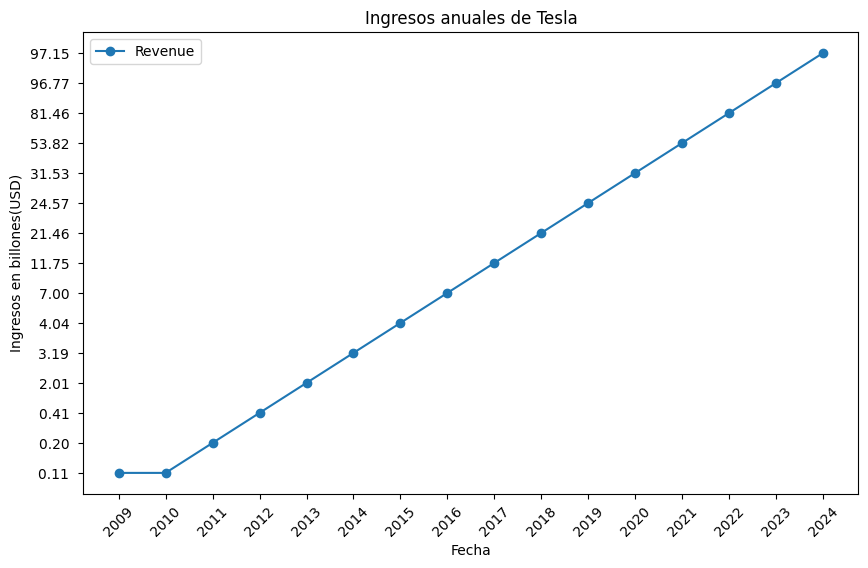

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(ds["Year"], ds["Revenue"], marker='o', label="Revenue")
plt.title("Ingresos anuales de Tesla")
plt.xlabel("Fecha")
plt.ylabel("Ingresos en billones(USD)")
plt.xticks(rotation=45)
plt.yticks()
plt.legend()

plt.savefig("revenue_plot.png")
plt.show()